<a href="https://colab.research.google.com/github/jjyjung/ai/blob/gh-pages/tf_keras_DNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# MNIST 원본 데이터 읽어오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# 데이터 확인용 (학습에는 불필요함)
print("x_train.shape = ", x_train.shape)
print("y_train.shape = ", y_train.shape)
print("x_test.shape = ", x_test.shape)
print("y_test.shape = ", y_test.shape)

x_train.shape =  (60000, 28, 28)
y_train.shape =  (60000,)
x_test.shape =  (10000, 28, 28)
y_test.shape =  (10000,)


In [4]:
print("y_train[0:10] = ", y_train[0:10])
print("x_train[0] = ", x_train[0])

y_train[0:10] =  [5 0 4 1 9 2 1 3 1 4]
x_train[0] =  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0  

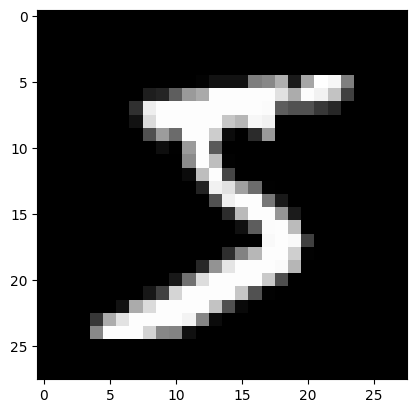

In [5]:
# 데이터 확인용 (학습에는 불필요함)
from matplotlib import pyplot as plt
import numpy as np

first_image = x_train[0]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [6]:
# DNN을 위한 X 변수의 데이터 변환
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000,784).astype('float32')
x_train /= 255
x_test /= 255

# DNN을 위한 Y 변수의 범주형 데이터(0~9)로 변환
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [7]:
# 데이터 확인용 (학습에는 불필요함)
print(list(y_train)[0:3])
print(x_train[0].shape)
list(x_train)[0]

[array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)]
(784,)


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [8]:
# DNN 모델 설계
model = tf.keras.Sequential()
model.add(layers.Dense(512, input_shape=(784,)))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

In [10]:
# compile model
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy'])

# train model
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10)
hist = model.fit(x_train, y_train,
                 batch_size = 100,  epochs = 50,
                 validation_split = 0.2, callbacks = [early_stop],
                 shuffle = True,    verbose = 1)

Epoch 1/50
480/480 [==============================] - 12s 22ms/step - loss: 0.2657 - accuracy: 0.9192 - val_loss: 0.1127 - val_accuracy: 0.9664
Epoch 2/50
480/480 [==============================] - 9s 20ms/step - loss: 0.1073 - accuracy: 0.9671 - val_loss: 0.0922 - val_accuracy: 0.9716
Epoch 3/50
480/480 [==============================] - 10s 20ms/step - loss: 0.0762 - accuracy: 0.9761 - val_loss: 0.0943 - val_accuracy: 0.9713
Epoch 4/50
480/480 [==============================] - 11s 22ms/step - loss: 0.0602 - accuracy: 0.9815 - val_loss: 0.0929 - val_accuracy: 0.9724
Epoch 5/50
480/480 [==============================] - 10s 21ms/step - loss: 0.0497 - accuracy: 0.9839 - val_loss: 0.0841 - val_accuracy: 0.9771
Epoch 6/50
480/480 [==============================] - 11s 22ms/step - loss: 0.0392 - accuracy: 0.9874 - val_loss: 0.0828 - val_accuracy: 0.9790
Epoch 7/50
480/480 [==============================] - 9s 19ms/step - loss: 0.0382 - accuracy: 0.9867 - val_loss: 0.0943 - val_accuracy: 0

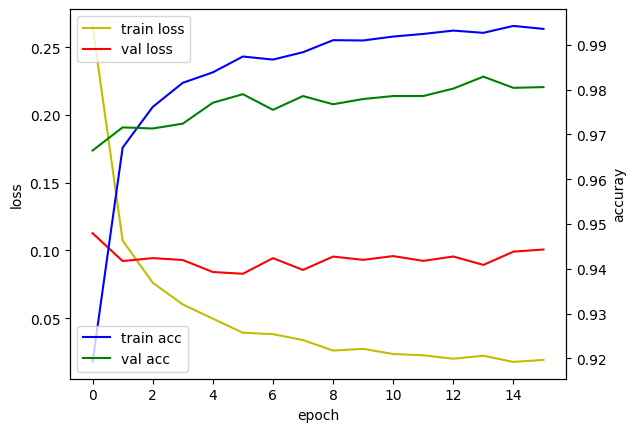

In [11]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [12]:
# evaluate model
score = model.evaluate(x_test, y_test, verbose = 1)
print('test_loss:', score[0])
print('test_acc:', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0777 - accuracy: 0.9819
test_loss: 0.07770460844039917
test_acc: 0.9818999767303467
